In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#preprocesing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Removing warnings

import warnings
warnings.filterwarnings('ignore')

# Storing plots

%matplotlib inline

In [2]:
train_dataset = pd.read_feather('/kaggle/input/amexfeather/train_data.ftr')

In [3]:
train_dataset = train_dataset.set_index('customer_ID', drop=True)

In [4]:
# train_dataset = train_dataset.groupby('customer_ID').tail(1).set_index('customer_ID', drop=True).sort_index()

In [5]:
# train_dataset

In [6]:
# train_dataset.describe()

In [7]:
train_dataset.shape

(5531451, 190)

In [9]:
train_dataset.isnull().sum()


S_2             0
P_2         45985
D_39            0
B_1             0
B_2          2016
           ...   
D_142     4587043
D_143      101548
D_144       40727
D_145      101548
target          0
Length: 190, dtype: int64

In [10]:
min_null_count =  int(((100-25)/100)*train_dataset.shape[0] + 1)
train_dataset = train_dataset.dropna( axis=1, 
                thresh=min_null_count)

In [11]:
train_dataset.shape

(5531451, 157)

In [12]:
# for column in train_dataset.columns:
#     print(column,"----->", train_dataset[column].unique())

In [13]:
train_dataset.drop(["S_2"],axis=1,inplace=True)

In [14]:
# train_dataset.drop(["customer_ID"],axis=1,inplace=True)

In [15]:
categories=[]
for categorical_column in train_dataset.select_dtypes(include=['category','object']).columns:
    categories.append(categorical_column)
categories

['D_63',
 'D_64',
 'D_68',
 'B_30',
 'B_38',
 'D_114',
 'D_116',
 'D_117',
 'D_120',
 'D_126']

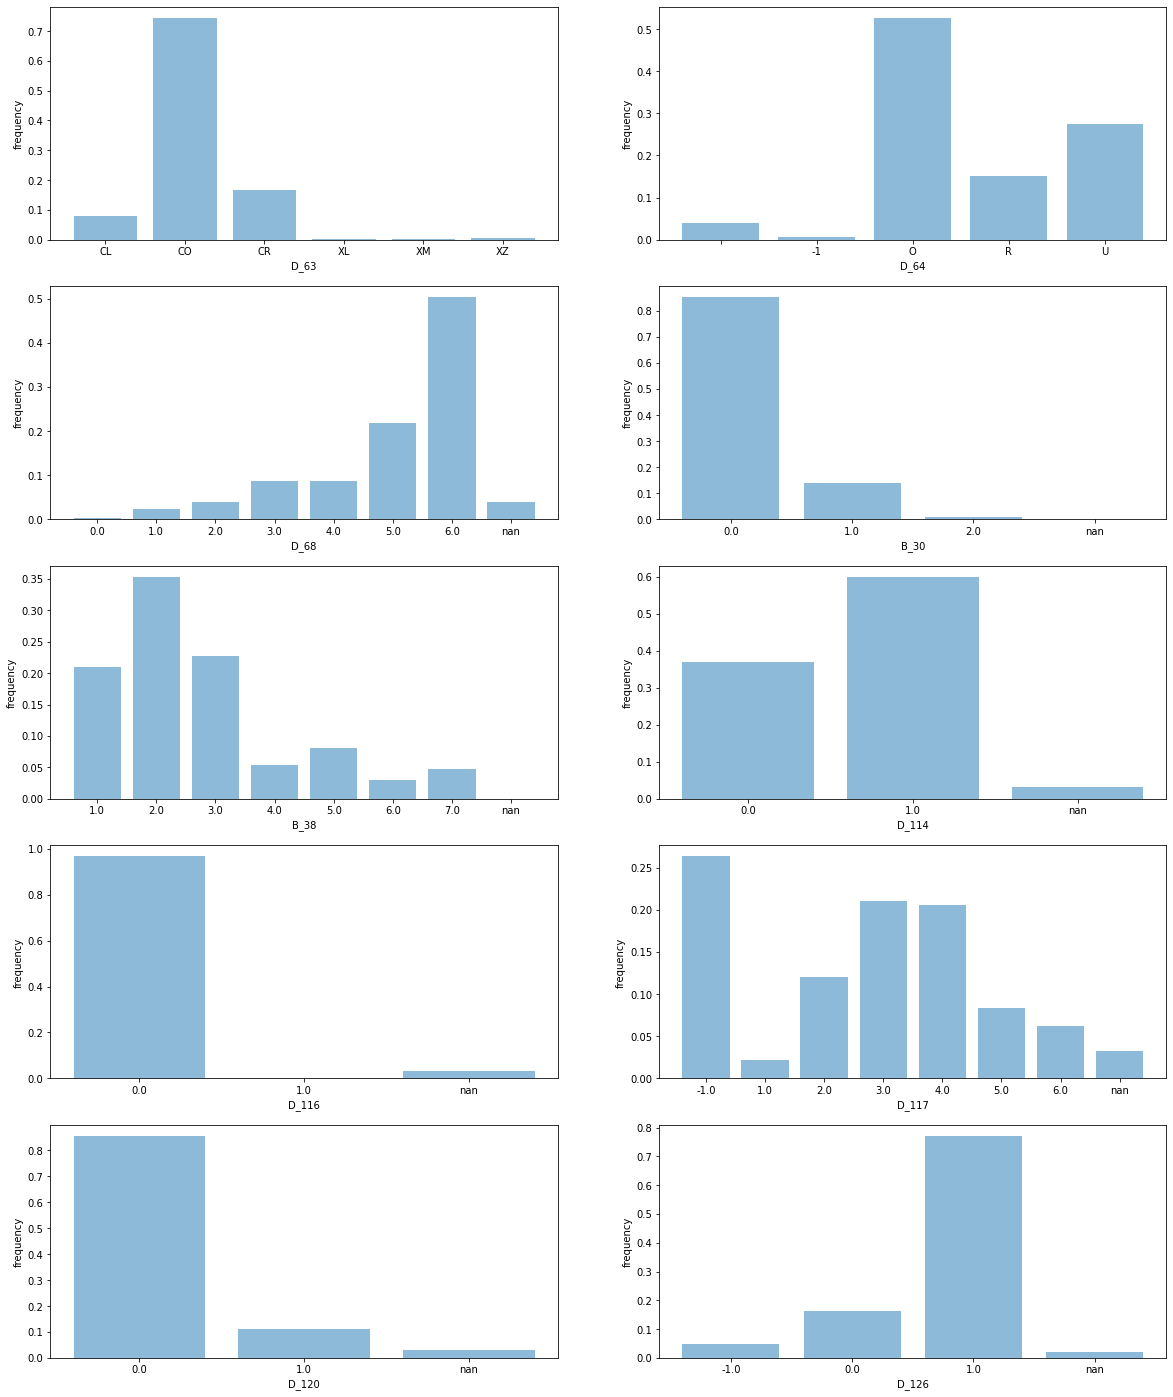

In [19]:
plt.figure(figsize=(20, 30))
for i, k in enumerate(categories):
    plt.subplot(6, 2, i+1)
    temp_val = pd.DataFrame(train_dataset[k].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp_val.index.name = 'value'
    temp_val.reset_index(inplace=True)
    plt.bar(temp_val.index, temp_val['count'], alpha=0.5)
    plt.xlabel(k)
    plt.ylabel('frequency')
    plt.xticks(temp_val.index, temp_val.value)
plt.show()

In [20]:
# enc = LabelEncoder()
for categorical_column in train_dataset.select_dtypes(include=['category','object']).columns:
    print(train_dataset[categorical_column].head())
#     features[categorical_column]=enc.fit_transform(features[categorical_column]

customer_ID
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    CR
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    CR
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    CR
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    CR
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    CR
Name: D_63, dtype: category
Categories (6, object): ['CL', 'CO', 'CR', 'XL', 'XM', 'XZ']
customer_ID
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    O
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    O
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    O
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    O
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    O
Name: D_64, dtype: category
Categories (5, object): ['', '-1', 'O', 'R', 'U']
customer_ID
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    6.0
0000099d6bd597052cdc

In [21]:
enc = LabelEncoder()
for categorical_column in train_dataset.select_dtypes(include=['category','object']).columns:
    train_dataset[categorical_column]=enc.fit_transform(train_dataset[categorical_column])

In [22]:
# train_dataset["D_63"]=enc.fit_transform(train_dataset["D_63"])

In [23]:
# train_dataset["D_64"]=enc.fit_transform(train_dataset["D_64"])

In [24]:
# train_dataset["D_64"]=train_dataset["D_64"].fillna(train_dataset["D_64"].mode())

In [25]:
# train_dataset["D_68"].isnull().sum()

In [26]:
for category in categories:
    train_dataset[category]=train_dataset[category].fillna(train_dataset[category].mode())

In [27]:
train_dataset["P_2"].isnull().sum()

45985

In [28]:
train_dataset["P_2"].mean()

nan

In [29]:
for column in train_dataset.columns:
    if(column not in categories):
        print(column)
        train_dataset[column]=train_dataset[column].fillna(train_dataset[column].median())

P_2
D_39
B_1
B_2
R_1
S_3
D_41
B_3
D_44
B_4
D_45
B_5
R_2
D_46
D_47
D_48
B_6
B_7
B_8
D_51
B_9
R_3
D_52
P_3
B_10
S_5
B_11
S_6
D_54
R_4
S_7
B_12
S_8
D_55
B_13
R_5
D_58
B_14
D_59
D_60
D_61
B_15
S_11
D_62
D_65
B_16
B_18
B_19
B_20
S_12
R_6
S_13
B_21
D_69
B_22
D_70
D_71
D_72
S_15
B_23
P_4
D_74
D_75
B_24
R_7
B_25
B_26
D_78
D_79
R_8
S_16
D_80
R_10
R_11
B_27
D_81
S_17
R_12
B_28
R_13
D_83
R_14
R_15
D_84
R_16
S_18
D_86
R_17
R_18
B_31
S_19
R_19
B_32
S_20
R_20
R_21
B_33
D_89
R_22
R_23
D_91
D_92
D_93
D_94
R_24
R_25
D_96
S_22
S_23
S_24
S_25
S_26
D_102
D_103
D_104
D_107
B_36
B_37
R_27
D_109
D_112
B_40
D_113
D_115
D_118
D_119
D_121
D_122
D_123
D_124
D_125
D_127
D_128
D_129
B_41
D_130
D_131
D_133
R_28
D_139
D_140
D_141
D_143
D_144
D_145
target


In [30]:
X = train_dataset.iloc[:, :-1]
y = train_dataset.iloc[:, -1:]

In [31]:
y.head()

,target
customer_ID,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0


In [32]:
del train_dataset


In [33]:
import gc

gc.collect()

31861

In [34]:
X = X.groupby('customer_ID').mean()

In [35]:
X.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_44,B_4,...,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933594,0.010704,0.012009,1.004883,0.004509,0.113220,0.005020,0.006454,0.004673,0.040314,...,0.005196,0.005447,0.004761,0.004089,0.003664,0.005341,0.005177,0.005066,0.005283,0.005814
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899902,0.215210,0.025650,0.991211,0.006245,0.120605,0.004993,0.005665,0.004311,0.016754,...,0.003448,0.004215,0.004520,0.005405,0.004906,0.006271,0.006008,0.004826,0.004219,0.004902
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.878418,0.004181,0.004387,0.815430,0.006622,0.163940,0.006844,0.005493,0.013901,0.032349,...,0.005951,0.004646,0.006783,0.004623,0.006004,0.004677,0.003607,0.004288,0.005112,0.004498
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.599121,0.048859,0.059875,0.955078,0.005665,0.247803,0.005489,0.006424,0.005245,0.034424,...,0.004509,0.004463,0.003370,0.005615,0.005775,0.005779,0.004181,0.006744,0.004768,0.005234
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.891602,0.004642,0.005939,0.814453,0.004181,0.166748,0.005352,0.005089,0.003550,0.153931,...,1.005859,0.005096,0.004745,0.004295,0.003853,0.004818,0.004818,0.004852,0.004379,0.004219


In [36]:
cor_matrix = X.corr()
col_core = set()

for i in range(len(cor_matrix.columns)):
    for j in range(i):
        if(cor_matrix.iloc[i, j] > 0.9):
            col_name = cor_matrix.columns[i]
            col_core.add(col_name)
col_core

{'B_11',
 'B_15',
 'B_20',
 'B_23',
 'B_33',
 'B_37',
 'D_104',
 'D_119',
 'D_141',
 'D_143',
 'D_74',
 'D_75',
 'S_24',
 'S_7'}

In [37]:
X = X.drop(col_core, axis=1)

In [38]:
y= y.groupby('customer_ID').mean()

In [39]:
y.head()

,target
customer_ID,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.0


In [40]:
y=y.round(0).astype(int)

In [41]:
for category in categories:
    X[category]=X[category].round(0).astype(int)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

In [43]:
x_train.isnull().sum()

P_2      0
D_39     0
B_1      0
B_2      0
R_1      0
        ..
R_28     0
D_139    0
D_140    0
D_144    0
D_145    0
Length: 141, dtype: int64

In [44]:
logmodel = LogisticRegression(max_iter=100)
logmodel.fit(x_train, y_train)

LogisticRegression()

In [45]:
model = logmodel

In [46]:
y_pred = model.predict(x_test)

In [47]:
#import lightgbm as lgb

#d_train = lgb.Dataset(x_train, label=y_train, categorical_feature = categories)

#params = {'objective': 'binary','n_estimators': 1200,'metric': 'binary_logloss','boosting': 'gbdt','num_leaves': 90,'reg_lambda' : 50,'colsample_bytree': 0.19,'learning_rate': 0.03,'min_child_samples': 2400,'max_bins': 511,'seed': 42,'verbose': -1}

# trained model with 100 iterations
#model = lgb.train(params, d_train, 100)

In [48]:
y_pred = logmodel.predict(x_test)

In [49]:
 def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

     def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
         df = (pd.concat([y_true, y_pred], axis='columns')
               .sort_values('prediction', ascending=False))
         df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
         four_pct_cutoff = int(0.04 * df['weight'].sum())
         df['weight_cumsum'] = df['weight'].cumsum()
         df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
         return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
     def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
         df = (pd.concat([y_true, y_pred], axis='columns')
               .sort_values('prediction', ascending=False))
         df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
         df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
         total_pos = (df['target'] * df['weight']).sum()
         df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
         df['lorentz'] = df['cum_pos_found'] / total_pos
         df['gini'] = (df['lorentz'] - df['random']) * df['weight']
         return df['gini'].sum()

     def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
         y_true_pred = y_true.rename(columns={'target': 'prediction'})
         return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

     g = normalized_weighted_gini(y_true, y_pred)
     d = top_four_percent_captured(y_true, y_pred)

     return 0.5 * (g + d)

In [51]:
 #print(amex_metric(y_test, y_pred))

In [52]:
from sklearn.metrics import accuracy_score


In [53]:
accuracy_score(y_test, y_pred)

0.8829481238287549

In [54]:
test_dataset = pd.read_feather('/kaggle/input/amexfeather/test_data.ftr')

In [55]:
test_dataset = test_dataset.set_index('customer_ID', drop=True)

In [56]:
num_columns = [col for col in X.columns]

In [57]:
test_dataset=test_dataset[num_columns]

In [58]:
enc = LabelEncoder()
for categorical_column in test_dataset.select_dtypes(include=['category','object']).columns:
    test_dataset[categorical_column]=enc.fit_transform(test_dataset[categorical_column])

In [59]:
for category in categories:
    test_dataset[category]=test_dataset[category].fillna(test_dataset[category].mode())

In [60]:
for column in test_dataset.columns:
    if(column not in categories):
        print(column)
        test_dataset[column]=test_dataset[column].fillna(test_dataset[column].median())

P_2
D_39
B_1
B_2
R_1
S_3
D_41
B_3
D_44
B_4
D_45
B_5
R_2
D_46
D_47
D_48
B_6
B_7
B_8
D_51
B_9
R_3
D_52
P_3
B_10
S_5
S_6
D_54
R_4
B_12
S_8
D_55
B_13
R_5
D_58
B_14
D_59
D_60
D_61
S_11
D_62
D_65
B_16
B_18
B_19
S_12
R_6
S_13
B_21
D_69
B_22
D_70
D_71
D_72
S_15
P_4
B_24
R_7
B_25
B_26
D_78
D_79
R_8
S_16
D_80
R_10
R_11
B_27
D_81
S_17
R_12
B_28
R_13
D_83
R_14
R_15
D_84
R_16
S_18
D_86
R_17
R_18
B_31
S_19
R_19
B_32
S_20
R_20
R_21
D_89
R_22
R_23
D_91
D_92
D_93
D_94
R_24
R_25
D_96
S_22
S_23
S_25
S_26
D_102
D_103
D_107
B_36
R_27
D_109
D_112
B_40
D_113
D_115
D_118
D_121
D_122
D_123
D_124
D_125
D_127
D_128
D_129
B_41
D_130
D_131
D_133
R_28
D_139
D_140
D_144
D_145


In [61]:
test_dataset = test_dataset.groupby('customer_ID').mean()

In [62]:
for category in categories:
    test_dataset[category]=test_dataset[category].round(0).astype(int)

In [63]:
y_pred = model.predict(test_dataset)

In [64]:
output = pd.DataFrame({'customer_ID': test_dataset.index, 'prediction': y_pred})


In [65]:
#cd /kaggle/working/

In [66]:
output.to_csv('submissionlinear.csv', index=False)